<a href="https://colab.research.google.com/github/TheAnalyst1111/Marketing_Analytics---Customer-Churn/blob/main/Marketing_Analytics_Top_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd

In [150]:
!git clone https://github.com/TheAnalyst1111/Top-Customers.git

fatal: destination path 'Top-Customers' already exists and is not an empty directory.


In [151]:
df = pd.read_table('/content/Top-Customers/rfm_xmas19.txt', sep=',')

In [152]:
df

,customer_id,trans_date,tran_amount
0,FM5295,2017-11-11,35
1,FM4768,2019-12-15,39
2,FM2122,2017-11-26,52
3,FM1217,2016-08-16,99
4,FM1850,2018-08-20,78
...,...,...,...
124995,FM8433,2016-03-26,64
124996,FM7232,2019-05-19,38
124997,FM8731,2019-08-28,42
124998,FM8133,2018-09-14,13


In [153]:
df = df.rename(columns={'trans_date': 'purchase_date', 'tran_amount': 'purchase_amount'})

In [154]:
df.head()

,customer_id,purchase_date,purchase_amount
0,FM5295,2017-11-11,35
1,FM4768,2019-12-15,39
2,FM2122,2017-11-26,52
3,FM1217,2016-08-16,99
4,FM1850,2018-08-20,78


In [155]:
import pandas as pd

# Assuming df is your DataFrame

# Find the maximum and minimum purchase dates
max_purchase_date = df['purchase_date'].max()
min_purchase_date = df['purchase_date'].min()

print("Maximum purchase date:", max_purchase_date)
print("Minimum purchase date:", min_purchase_date)

Maximum purchase date: 2019-12-16
Minimum purchase date: 2016-02-16


In [156]:
import pandas as pd

# Assuming df is your DataFrame

# Count occurrences of each customer ID
customer_counts = df['customer_id'].value_counts()

# Create a new DataFrame with customer IDs and their counts
new_df = pd.DataFrame({'customer_id': customer_counts.index, 'count': customer_counts.values})

print(new_df)

     customer_id  count
0         FM4424     39
1         FM4320     38
2         FM3799     36
3         FM1215     35
4         FM5109     35
...          ...    ...
6884      FM8559      4
6885      FM7716      4
6886      FM8376      4
6887      FM7224      4
6888      FM7333      4

[6889 rows x 2 columns]


So we can see that customer have purchased more than once with the company, so we can feature engineer recency, frequency and monetary value to segment the customers, calculate churn as well as calculate the CLV.

In [157]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [158]:
df

,customer_id,purchase_date,purchase_amount
0,FM5295,2017-11-11,35
1,FM4768,2019-12-15,39
2,FM2122,2017-11-26,52
3,FM1217,2016-08-16,99
4,FM1850,2018-08-20,78
...,...,...,...
124995,FM8433,2016-03-26,64
124996,FM7232,2019-05-19,38
124997,FM8731,2019-08-28,42
124998,FM8133,2018-09-14,13


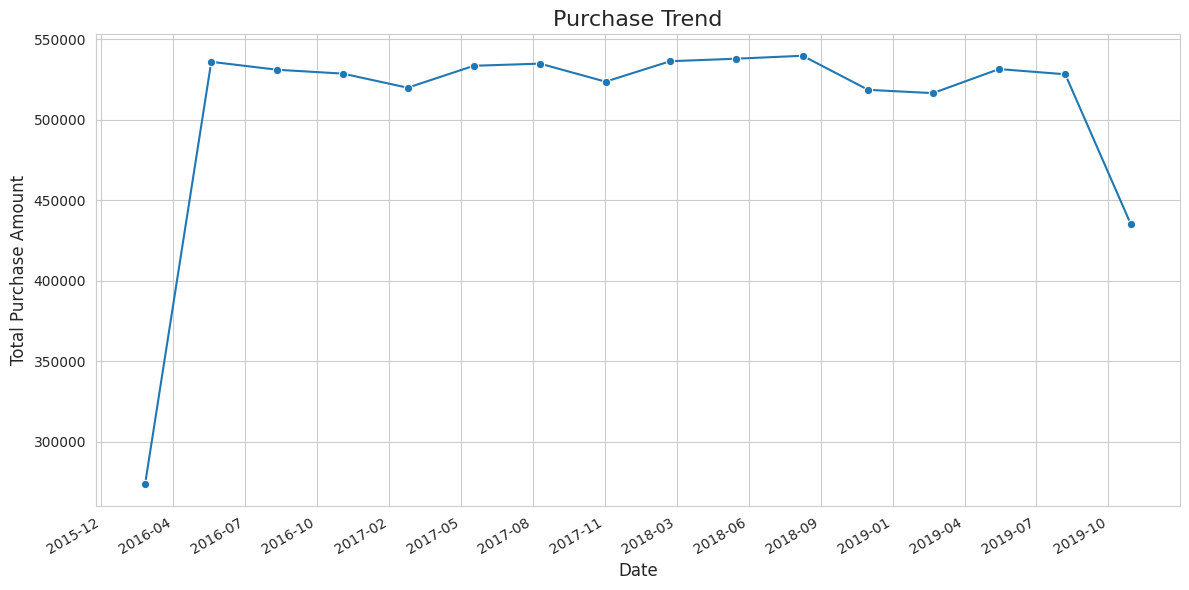

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns


# Convert purchase_date to datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Create a function to get the first month of each quarter
def get_quarter_start(date):
    return date.to_period('Q').asfreq('M').to_timestamp()

# Group by the first month of each quarter and sum purchase amounts
df['quarter_start'] = df['purchase_date'].apply(get_quarter_start)
quarterly_data = df.groupby('quarter_start')['purchase_amount'].sum().reset_index()

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the line plot
sns.lineplot(x='quarter_start', y='purchase_amount', data=quarterly_data, marker='o')

# Customize the plot
plt.title('Purchase Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

# Ensure all data points are shown
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(quarterly_data)))

# Show the plot
plt.tight_layout()
plt.show()

Sales picked up rapidily in 2 months starting from Feb 2016 and has ever been constant since that till august 2019 then there is a sudden drop in the sales >>>>> Point of investigation


In [160]:
import datetime as dt

# Convert purchase_date to datetime if it's not already
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Define the reference date
reference_date = dt.datetime(2019, 12, 20)

# Calculate recency
df['recency'] = (reference_date - df.groupby('customer_id')['purchase_date'].max()).dt.days


In [161]:
df['frequency'] = df.groupby('customer_id')['purchase_date'].transform('count')
df['monetary_value'] = df.groupby('customer_id')['purchase_amount'].transform('sum')


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      125000 non-null  object        
 1   purchase_date    125000 non-null  datetime64[ns]
 2   purchase_amount  125000 non-null  int64         
 3   quarter_start    125000 non-null  datetime64[ns]
 4   recency          0 non-null       float64       
 5   frequency        125000 non-null  int64         
 6   monetary_value   125000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 6.7+ MB


In [163]:
# Try to convert the 'purchase_date' column to datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors='coerce')

# Check if there are any NaT values in the 'purchase_date' column
print(df['purchase_date'].isnull().sum())


0


In [164]:
# Print the maximum 'purchase_date' for each customer
print(df.groupby('customer_id')['purchase_date'].max())


customer_id
FM1112   2019-10-14
FM1113   2019-11-09
FM1114   2019-11-12
FM1115   2019-12-05
FM1116   2019-05-25
            ...    
FM8996   2019-09-09
FM8997   2019-03-28
FM8998   2019-09-22
FM8999   2019-04-02
FM9000   2019-11-28
Name: purchase_date, Length: 6889, dtype: datetime64[ns]


In [165]:
import datetime as dt

# Convert purchase_date to datetime if it's not already
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Define the reference date
reference_date = dt.datetime(2019, 12, 20)

# Calculate recency
df['recency'] = (reference_date - df.groupby('customer_id')['purchase_date'].max()).dt.days


In [166]:
import datetime as dt

# Convert purchase_date to datetime if it's not already
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Define the reference date
reference_date = dt.datetime(2019, 12, 20)


df['recency'] = (reference_date - df.groupby('customer_id')['purchase_date'].max()).dt.days.reset_index(drop=True)


In [167]:
# Print the maximum 'purchase_date' for each customer
print(df.groupby('customer_id')['purchase_date'].max())


customer_id
FM1112   2019-10-14
FM1113   2019-11-09
FM1114   2019-11-12
FM1115   2019-12-05
FM1116   2019-05-25
            ...    
FM8996   2019-09-09
FM8997   2019-03-28
FM8998   2019-09-22
FM8999   2019-04-02
FM9000   2019-11-28
Name: purchase_date, Length: 6889, dtype: datetime64[ns]


In [168]:
# Print the result of the subtraction operation
print((reference_date - df.groupby('customer_id')['purchase_date'].max()))


customer_id
FM1112    67 days
FM1113    41 days
FM1114    38 days
FM1115    15 days
FM1116   209 days
           ...   
FM8996   102 days
FM8997   267 days
FM8998    89 days
FM8999   262 days
FM9000    22 days
Name: purchase_date, Length: 6889, dtype: timedelta64[ns]


In [169]:
# Set the index column to be the index of the dataframe
df.set_index('customer_id', inplace=True)

# Calculate recency
df['recency'] = (reference_date - df.groupby('customer_id')['purchase_date'].max()).dt.days

# Fill NaN values with a large number
df['recency'].fillna(9999, inplace=True)

# Reset the index of the dataframe
df.reset_index(inplace=True)


In [170]:
df

,customer_id,purchase_date,purchase_amount,quarter_start,recency,frequency,monetary_value
0,FM5295,2017-11-11,35,2017-12-01,117,25,1637
1,FM4768,2019-12-15,39,2019-12-01,5,26,1721
2,FM2122,2017-11-26,52,2017-12-01,27,23,1648
3,FM1217,2016-08-16,99,2016-09-01,82,20,1431
4,FM1850,2018-08-20,78,2018-09-01,11,24,1908
...,...,...,...,...,...,...,...
124995,FM8433,2016-03-26,64,2016-03-01,81,20,960
124996,FM7232,2019-05-19,38,2019-06-01,202,12,498
124997,FM8731,2019-08-28,42,2019-09-01,22,15,654
124998,FM8133,2018-09-14,13,2018-09-01,91,12,509


In [171]:
# Define the reference date
reference_date = dt.datetime(2019, 12, 20)

# Define the churn period (e.g. 3 months)
churn_period = 90
# Identify customers who have not made a purchase in the churn period
churned_customers = df[df['recency'] > 90]['customer_id'].unique()

# Calculate the churn rate
churn_rate = len(churned_customers) / len(df['customer_id'].unique())

print("Churn rate: {:.2%}".format(churn_rate))


Churn rate: 33.81%


In [172]:
# Define the reference date
reference_date = dt.datetime(2019, 12, 20)

# Define the churn period (e.g. 3 months)
churn_period = 90

# Create the 'is_churn' column
df['is_churn'] = df['recency'] > churn_period

# Convert the 'is_churn' column to boolean
df['is_churn'] = df['is_churn'].astype(int)


In [173]:
df.head()

,customer_id,purchase_date,purchase_amount,quarter_start,recency,frequency,monetary_value,is_churn
0,FM5295,2017-11-11,35,2017-12-01,117,25,1637,1
1,FM4768,2019-12-15,39,2019-12-01,5,26,1721,0
2,FM2122,2017-11-26,52,2017-12-01,27,23,1648,0
3,FM1217,2016-08-16,99,2016-09-01,82,20,1431,0
4,FM1850,2018-08-20,78,2018-09-01,11,24,1908,0


In [174]:
# Normalize the RFM values to a scale of 0-5
df['recency_score'] = (df['recency'].max() - df['recency']) / df['recency'].max() * 5
df['frequency_score'] = (df['frequency'] / df['frequency'].max()) * 5
df['monetary_score'] = (df['monetary_value'] / df['monetary_value'].max()) * 5


# Calculate the RFM score for each customer
df['rfm_score'] = df[['recency_score', 'frequency_score', 'monetary_score']].mean(axis=1)

# Segment the customers based on their RFM scores
def segment_customers(row):
    if row['rfm_score'] >= 4.5:
        return 'Champions'
    elif row['rfm_score'] >= 4.0:
        return 'Loyal Customers'
    elif row['rfm_score'] >= 3.5:
        return 'Potential Loyalists'
    elif row['rfm_score'] >= 3.0:
        return 'Recent Customers'
    elif row['rfm_score'] >= 2.5:
        return 'Promising'
    elif row['rfm_score'] >= 2.0:
        return 'Customers Needing Attention'
    else:
        return 'At Risk'

df['segment'] = df.apply(segment_customers, axis=1)


In [175]:
df

,customer_id,purchase_date,purchase_amount,quarter_start,recency,frequency,monetary_value,is_churn,recency_score,frequency_score,monetary_score,rfm_score,segment
0,FM5295,2017-11-11,35,2017-12-01,117,25,1637,1,4.322132,3.205128,2.790658,3.439306,Recent Customers
1,FM4768,2019-12-15,39,2019-12-01,5,26,1721,0,4.971031,3.333333,2.933856,3.746074,Potential Loyalists
2,FM2122,2017-11-26,52,2017-12-01,27,23,1648,0,4.843569,2.948718,2.809410,3.533899,Potential Loyalists
3,FM1217,2016-08-16,99,2016-09-01,82,20,1431,0,4.524913,2.564103,2.439482,3.176166,Recent Customers
4,FM1850,2018-08-20,78,2018-09-01,11,24,1908,0,4.936269,3.076923,3.252642,3.755278,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,FM8433,2016-03-26,64,2016-03-01,81,20,960,0,4.530707,2.564103,1.636550,2.910453,Promising
124996,FM7232,2019-05-19,38,2019-06-01,202,12,498,1,3.829664,1.538462,0.848960,2.072362,Customers Needing Attention
124997,FM8731,2019-08-28,42,2019-09-01,22,15,654,0,4.872538,1.923077,1.114899,2.636838,Promising
124998,FM8133,2018-09-14,13,2018-09-01,91,12,509,1,4.472769,1.538462,0.867712,2.292981,Customers Needing Attention


In [176]:
# Create the 'churned_customers' dataframe
churned_customers = df[df['is_churn'] == 1]


In [177]:
# Create the 'churned_customers_2019' dataframe
churned_customers_2019 = df[(df['is_churn'] == 1) & (df['purchase_date'].dt.year == 2019)]

churned_customers_2019 = churned_customers_2019.drop_duplicates(subset='customer_id')

# Create the 'churned_customers_2019_summary' dataframe
churned_customers_2019 = churned_customers_2019[['customer_id','rfm_score', 'segment', 'monetary_value','recency']]

# Sort the 'churned_customers_2019' dataframe based on the RFM score in descending order
churned_customers_2019 = churned_customers_2019.sort_values(by='rfm_score', ascending=False)



In [178]:
churned_customers_2019.head(100)

,customer_id,rfm_score,segment,monetary_value,recency
25180,FM3805,4.363177,Loyal Customers,2453,100
12205,FM3799,4.329926,Loyal Customers,2513,157
4880,FM4074,4.313968,Loyal Customers,2462,106
62838,FM1215,4.236148,Loyal Customers,2362,139
40732,FM2620,4.217630,Loyal Customers,2360,148
...,...,...,...,...,...
7051,FM1370,3.553096,Potential Loyalists,1864,147
14115,FM1832,3.547039,Potential Loyalists,1796,108
29558,FM3462,3.546461,Potential Loyalists,1843,100
22563,FM6103,3.542365,Potential Loyalists,1730,91


In [179]:
df['purchase_amount'].mean()

64.991912

In [180]:
df['purchase_amount'].median()

65.0

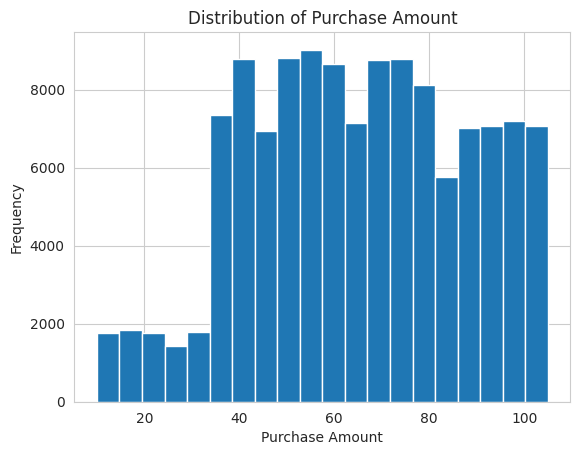

In [181]:
import matplotlib.pyplot as plt

# Create the histogram plot
plt.hist(df['purchase_amount'], bins=20)

# Add labels and title
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')

# Show the plot
plt.show()


In [182]:
discount_amount = df['purchase_amount'].mean() * .30

In [183]:
discount_amount

19.4975736

In [184]:
no_customers = 5000/discount_amount
print(no_customers )

256.44216570619847


In [185]:
df_final = churned_customers_2019.head(256)

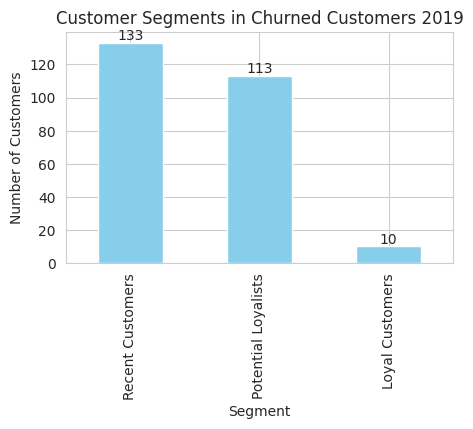

In [186]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a bar graph with segment as the variable
segment_counts = df_final['segment'].value_counts()

# Plot the bar graph
plt.figure(figsize=(5, 3))
bars = segment_counts.plot(kind='bar', color='skyblue')

# Add data labels to the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segments in Churned Customers 2019')

# Show the plot
plt.show()


In [197]:
# Save the dataframe to a CSV file
df_final.to_csv('/content/Top-Customers/df_final.csv', index=False)


In [188]:
df

,customer_id,purchase_date,purchase_amount,quarter_start,recency,frequency,monetary_value,is_churn,recency_score,frequency_score,monetary_score,rfm_score,segment
0,FM5295,2017-11-11,35,2017-12-01,117,25,1637,1,4.322132,3.205128,2.790658,3.439306,Recent Customers
1,FM4768,2019-12-15,39,2019-12-01,5,26,1721,0,4.971031,3.333333,2.933856,3.746074,Potential Loyalists
2,FM2122,2017-11-26,52,2017-12-01,27,23,1648,0,4.843569,2.948718,2.809410,3.533899,Potential Loyalists
3,FM1217,2016-08-16,99,2016-09-01,82,20,1431,0,4.524913,2.564103,2.439482,3.176166,Recent Customers
4,FM1850,2018-08-20,78,2018-09-01,11,24,1908,0,4.936269,3.076923,3.252642,3.755278,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,FM8433,2016-03-26,64,2016-03-01,81,20,960,0,4.530707,2.564103,1.636550,2.910453,Promising
124996,FM7232,2019-05-19,38,2019-06-01,202,12,498,1,3.829664,1.538462,0.848960,2.072362,Customers Needing Attention
124997,FM8731,2019-08-28,42,2019-09-01,22,15,654,0,4.872538,1.923077,1.114899,2.636838,Promising
124998,FM8133,2018-09-14,13,2018-09-01,91,12,509,1,4.472769,1.538462,0.867712,2.292981,Customers Needing Attention


In [189]:
# 3.0 MACHINE LEARNING

# 3.1 TIME SPLITTING (STAGE 1)


n_days = 90
max_date = df['purchase_date'].max()
cutoff = max_date - pd.Timedelta(n_days, unit="d")

temporal_in_df = df[df['purchase_date'] <= cutoff]
temporal_out_df = df[df['purchase_date'] > cutoff]

# 3.2 FEATURE ENGINEERING (RFM)

# Make Targets from out data
targets_df = temporal_out_df.groupby('customer_id').agg({'purchase_amount': 'sum', 'purchase_date': 'count'}).rename(columns={'purchase_amount': 'spend_90_total', 'purchase_date': 'frequency_90'}).assign(spend_90_flag=1)

# Make Recency (Date) Features from in data
recency_features_df = temporal_in_df.groupby('customer_id').apply(lambda x: (max_date - x['purchase_date'].max()) / pd.Timedelta(1, "day")).to_frame().set_axis(["recency"], axis=1)

# Make Frequency (Count) Features from in data
frequency_features_df = temporal_in_df.groupby('customer_id').size().to_frame().set_axis(['frequency'], axis=1)

# Make Price (Monetary) Features from in data
price_features_df = temporal_in_df.groupby('customer_id').agg({'purchase_amount': 'sum'}).rename(columns={'purchase_amount': 'price_sum'})

# 3.3 COMBINE FEATURES
features_df = pd.concat([recency_features_df, frequency_features_df, price_features_df], axis=1).merge(targets_df, left_index=True, right_index=True, how="left").fillna(0)

# 4.0 MACHINE LEARNING

from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV

X = features_df[['recency', 'frequency', 'price_sum']]

# 4.1 NEXT 90-DAY SPEND PREDICTION
y_spend = features_df['spend_90_total']
xgb_reg_model = GridSearchCV(estimator=XGBRegressor(objective="reg:squarederror", random_state=123), param_grid=dict(learning_rate=[0.01, 0.1, 0.3, 0.5]), scoring='neg_mean_absolute_error', refit=True, cv=5)
xgb_reg_model.fit(X, y_spend)

# 4.2 NEXT 90-DAY SPEND PROBABILITY
y_prob = features_df['spend_90_flag']
xgb_clf_model = GridSearchCV(estimator=XGBClassifier(objective="binary:logistic", random_state=123), param_grid=dict(learning_rate=[0.01, 0.1, 0.3, 0.5]), scoring='roc_auc', refit=True, cv=5)
xgb_clf_model.fit(X, y_prob)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=123, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='roc_auc')

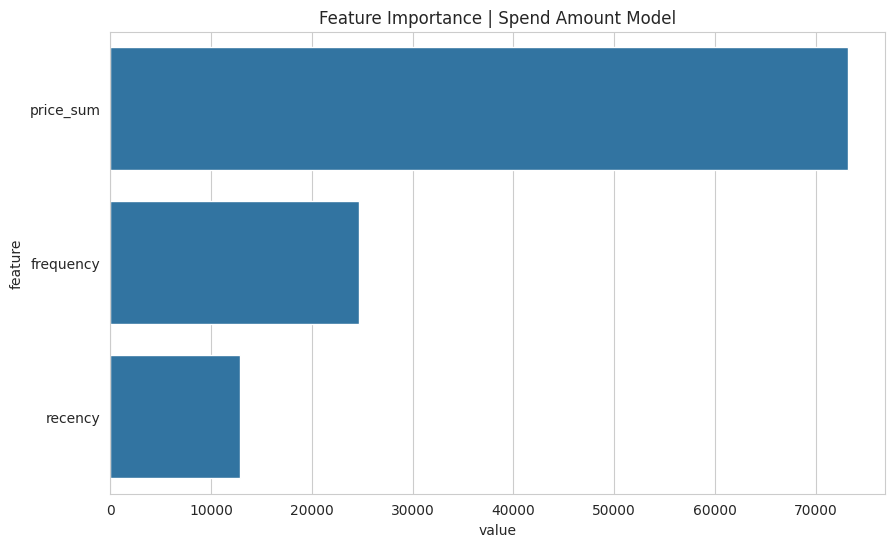

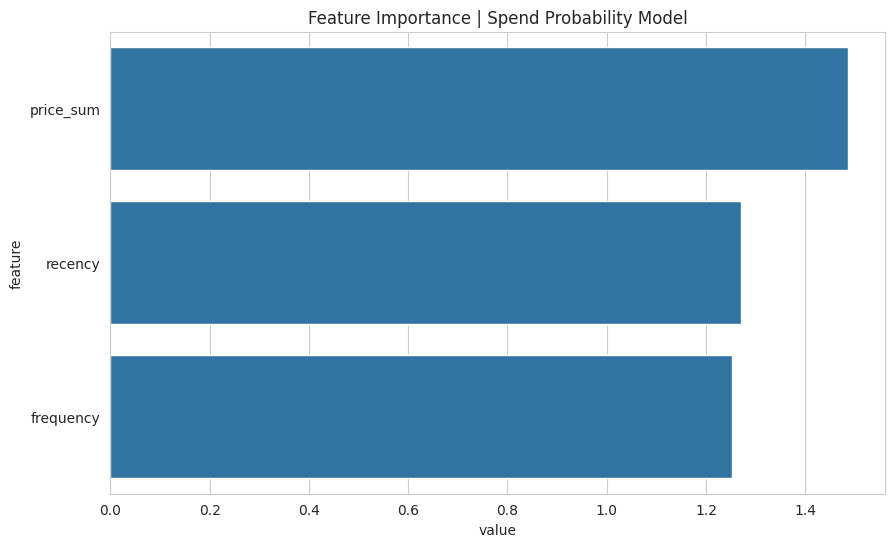

In [190]:
# 4.3 FEATURE IMPORTANCE (GLOBAL)

import joblib

# Importance | Spend Amount Model
imp_spend_amount_dict = xgb_reg_model.best_estimator_.get_booster().get_score(importance_type='gain')
imp_spend_amount_df = pd.DataFrame(data={'feature': list(imp_spend_amount_dict.keys()), 'value': list(imp_spend_amount_dict.values())})

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='feature', data=imp_spend_amount_df.sort_values('value', ascending=False))
plt.title('Feature Importance | Spend Amount Model')
plt.show()

# Importance | Spend Probability Model
imp_spend_prob_dict = xgb_clf_model.best_estimator_.get_booster().get_score(importance_type='gain')
imp_spend_prob_df = pd.DataFrame(data={'feature': list(imp_spend_prob_dict.keys()), 'value': list(imp_spend_prob_dict.values())})

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='feature', data=imp_spend_prob_df.sort_values('value', ascending=False))
plt.title('Feature Importance | Spend Probability Model')
plt.show()

# 5.0 SAVE WORK

# Save Predictions
predictions_df = pd.concat([pd.DataFrame(xgb_reg_model.predict(X)).set_axis(['pred_spend'], axis=1), pd.DataFrame(xgb_clf_model.predict_proba(X))[[1]].set_axis(['pred_prob'], axis=1), features_df.reset_index()], axis=1)
predictions_df.to_pickle("/content/Top-Customers/predictions_df.pkl")

# Save Importance
imp_spend_amount_df.to_pickle("/content/Top-Customers/imp_spend_amount_df.pkl")
imp_spend_prob_df.to_pickle("/content/Top-Customers/imp_spend_prob_df.pkl")

# Save Models
joblib.dump(xgb_reg_model, '/content/Top-Customers/xgb_reg_model.pkl')
joblib.dump(xgb_clf_model, '/content/Top-Customers/xgb_clf_model.pkl')

# 6.0 HOW CAN WE USE THIS INFORMATION

# 6.1 Which customers have the highest spend probability in next 90-days?
high_spend_prob_df = predictions_df.sort_values('pred_prob', ascending=False)

# 6.2 Which customers have recently purchased but are unlikely to buy?
recent_low_spend_prob_df = predictions_df[(predictions_df['recency'] > -90) & (predictions_df['pred_prob'] < 0.20)].sort_values('pred_prob', ascending=False)

# 6.3 Missed opportunities: Big spenders that could be unlocked
missed_opportunities_df = predictions_df[predictions_df['spend_90_total'] == 0.0].sort_values('pred_spend', ascending=False)


In [191]:
predictions_df

,pred_spend,pred_prob,customer_id,recency,frequency,price_sum,spend_90_total,frequency_90,spend_90_flag
0,76.825386,0.759402,FM1112,103.0,14,973,39.0,1.0,1.0
1,84.705544,0.808324,FM1113,231.0,17,1270,220.0,3.0,1.0
2,83.246407,0.747053,FM1114,95.0,17,1258,174.0,2.0,1.0
3,85.581520,0.863946,FM1115,273.0,21,1604,55.0,1.0,1.0
4,78.674713,0.580842,FM1116,205.0,13,857,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6884,48.230927,0.501549,FM8996,98.0,13,582,0.0,0.0,0.0
6885,46.205772,0.255617,FM8997,263.0,14,543,0.0,0.0,0.0
6886,52.910412,0.805639,FM8998,147.0,12,575,49.0,1.0,1.0
6887,42.556221,0.165117,FM8999,258.0,12,383,0.0,0.0,0.0


In [199]:
# Save the dataframe to a CSV file ---- Dataset containing the prediction spend and probability

predictions_df.to_csv('/content/Top-Customers/predictions_df.csv', index=False)


In [193]:
df_final_V2 = churned_customers_2019

In [198]:
# Save the dataframe to a CSV file --- Entire data set of churned customers
df_final_V2.to_csv('/content/Top-Customers/df_final_v2.csv', index=False)

In [194]:
/co